After loading data , next step will be checking Null values if exists

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ramsha275/Instagram-Reach-Analysis/main/Instagram%20data.csv' , encoding = 'latin1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [ ]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# Analyzing Insta Reach 

<ipython-input-21-f2c7f3f38c5d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Home'])


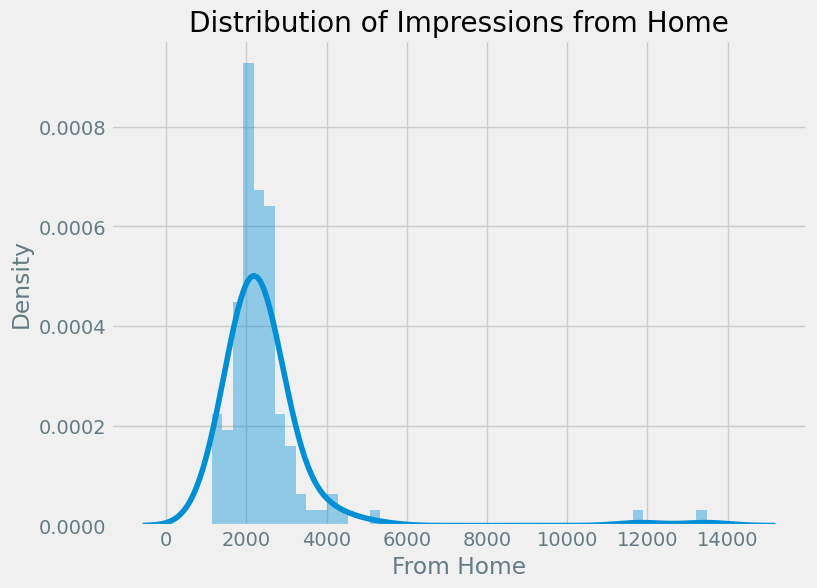

In [ ]:
plt.figure(figsize = (8,6))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home")
sns.distplot(df['From Home'])
plt.show()

<ipython-input-23-459cbc5cbd00>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Hashtags'])


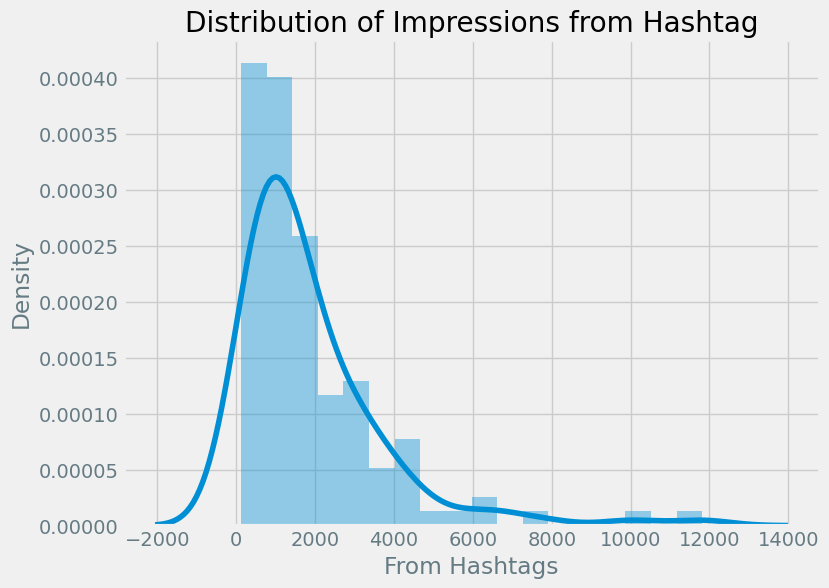

In [ ]:
plt.figure(figsize = (8,6))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Hashtag")
sns.distplot(df['From Hashtags'])
plt.show()

<ipython-input-26-9fe543d8a551>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Explore'])


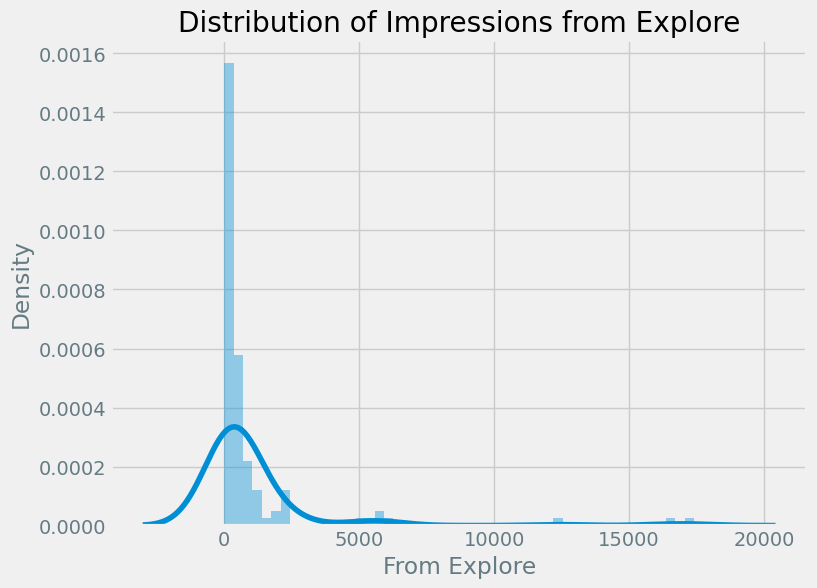

In [ ]:
plt.figure(figsize = (8,6))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Explore")
sns.distplot(df['From Explore'])
plt.show()

Now let’s have a look at the percentage of impressions I get from various sources on Instagram:

In [ ]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [ ]:
home = df['From Home'].sum()
exp = df['From Explore'].sum()
hashtag = df['From Hashtags'].sum()
other = df['From Other'].sum()

In [ ]:
labels  = ['From Home' , 'From Explore', 'From Hashtags', 'From Other']
values = [home, exp, hashtag, other]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

## Analyzing Content
Now let’s analyze the content of my Instagram posts. The dataset has two columns, namely caption and hashtags, which will help us understand the kind of content I post on Instagram.

Let’s create a wordcloud of the caption column to look at the most used words in the caption of my Instagram posts:

In [41]:
caption_text =  " ".join([i for i in df.Caption])
img = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(caption_text)

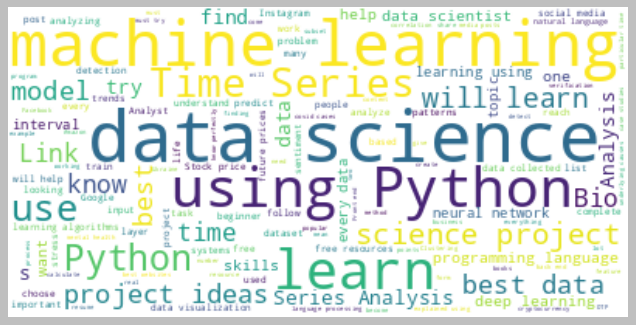

In [42]:
plt.style.use('classic')
plt.figure( figsize=(10,8))
plt.imshow(img, interpolation='bilinear')
plt.axis("off")
plt.show()

Let’s create a wordcloud of the Hashtags column to look at the most used hasthtags in my Instagram posts:

In [52]:
hashtags_text = " ".join([i for i in df.Hashtags]).replace('\xa0', ' ')
hashtags_text

'#finance #money #business #investing #investment #trading #stockmarket #data #datascience #dataanalysis #dataanalytics #datascientist #machinelearning #python #pythonprogramming #pythonprojects #pythoncode #artificialintelligence #ai #dataanalyst #amankharwal #thecleverprogrammer #healthcare #health #covid #data #datascience #dataanalysis #dataanalytics #datascientist #machinelearning #python #pythonprogramming #pythonprojects #pythoncode #artificialintelligence #ai #dataanalyst #amankharwal #thecleverprogrammer #data #datascience #dataanalysis #dataanalytics #datascientist #machinelearning #python #pythonprogramming #pythonprojects #pythoncode #artificialintelligence #ai #deeplearning #machinelearningprojects #datascienceprojects #amankharwal #thecleverprogrammer #machinelearningmodels #python #pythonprogramming #pythonprojects #pythoncode #pythonlearning #pythondeveloper #pythoncoding #pythonprogrammer #amankharwal #thecleverprogrammer #pythonprojects #datavisualization #datascience

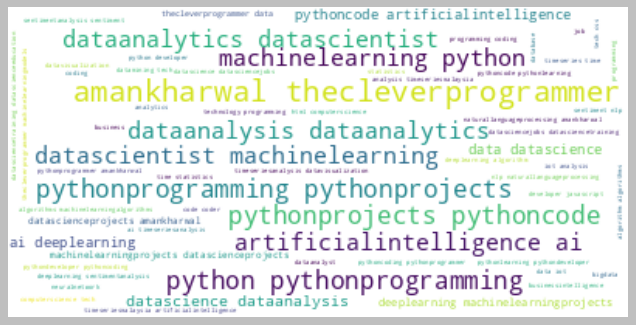

In [53]:
h_img = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(hashtags_text)
plt.style.use('classic')
plt.figure( figsize=(10,8))
plt.imshow(h_img, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyzing Relationships
Now let’s analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.
Let’s have a look at the relationship between the number of likes and the number of impressions on my Instagram posts: